In [61]:
import flipflopinertial as ffi
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
import os
from imageio import imread


# set up a custom colormap
from matplotlib.colors import LinearSegmentedColormap
cm_data = np.loadtxt("batlow.txt")
batlow = LinearSegmentedColormap.from_list('batlow', cm_data)
x = np.linspace(0,1,25)
np.random.shuffle(x)
import cycler
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color',batlow(x))
x = np.array([0.0, 0.25, 0.5, 0.6,0.7])
colors = batlow(x)[::-1]
c5,c4,c3,c2,c1=colors


# set the latex font
#plt.rcParams.update({
#    "text.usetex": True,})
mpl.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
mpl.rc('text', usetex=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# this figure shows the flux accumulating via particles crossing the control surface

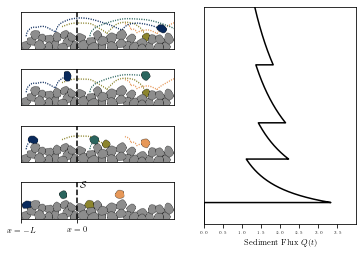

In [6]:
base = '../figures/fig1timestamps/'
imfiles = sorted([f for f in os.listdir(base) if '.png' in f])
ims = [imread(base+f) for f in imfiles]


#fig = plt.figure(tight_layout=True)
fig = plt.figure()
gs = fig.add_gridspec(4, 2)

# top panel on left
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(ims[3])
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.axvline(1100, color='black',lw=1.5,linestyle='--')

ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(ims[2])
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.axvline(1100, color='black',lw=1.5,linestyle='--')


ax3 = fig.add_subplot(gs[2, 0])
ax3.imshow(ims[1])
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax3.axvline(1100, color='black',lw=1.5,linestyle='--')


# bottom panel on left
ax4 = fig.add_subplot(gs[3, 0])
ax4.imshow(ims[0])
ax4.get_yaxis().set_visible(False)
ax4.set_xticks([0,1100])
ax4.set_xticklabels([r"$x=-L$",r"$x=0$"],fontsize=8)
ax4.axvline(1100, color='black',lw=1.5,linestyle='--')
ax4.text(1150,100,r"$\mathcal{S}$")


# rightmost panel of sediment flux
ax5 = fig.add_subplot(gs[:, 1])
ax5.set_xlabel(r"Sediment Flux $Q(t)$",fontsize=8)
ax5.get_yaxis().set_visible(False)

t = np.linspace(1e-9,3,10000)
def q(t):
    t1 = 0.3
    t2 = 0.9
    t3 = 1.4
    t4 = 2.2
    return (np.heaviside(t-t1,1)
            +np.heaviside(t-t2,1)
            +np.heaviside(t-t3,1)
            +np.heaviside(t-t4,1)
           )/t
ax5.plot(q(t),t,color='black')
ax5.set_xlim(0,1.2*q(t).max())
ax5.set_ylim(0,3)
plt.show()

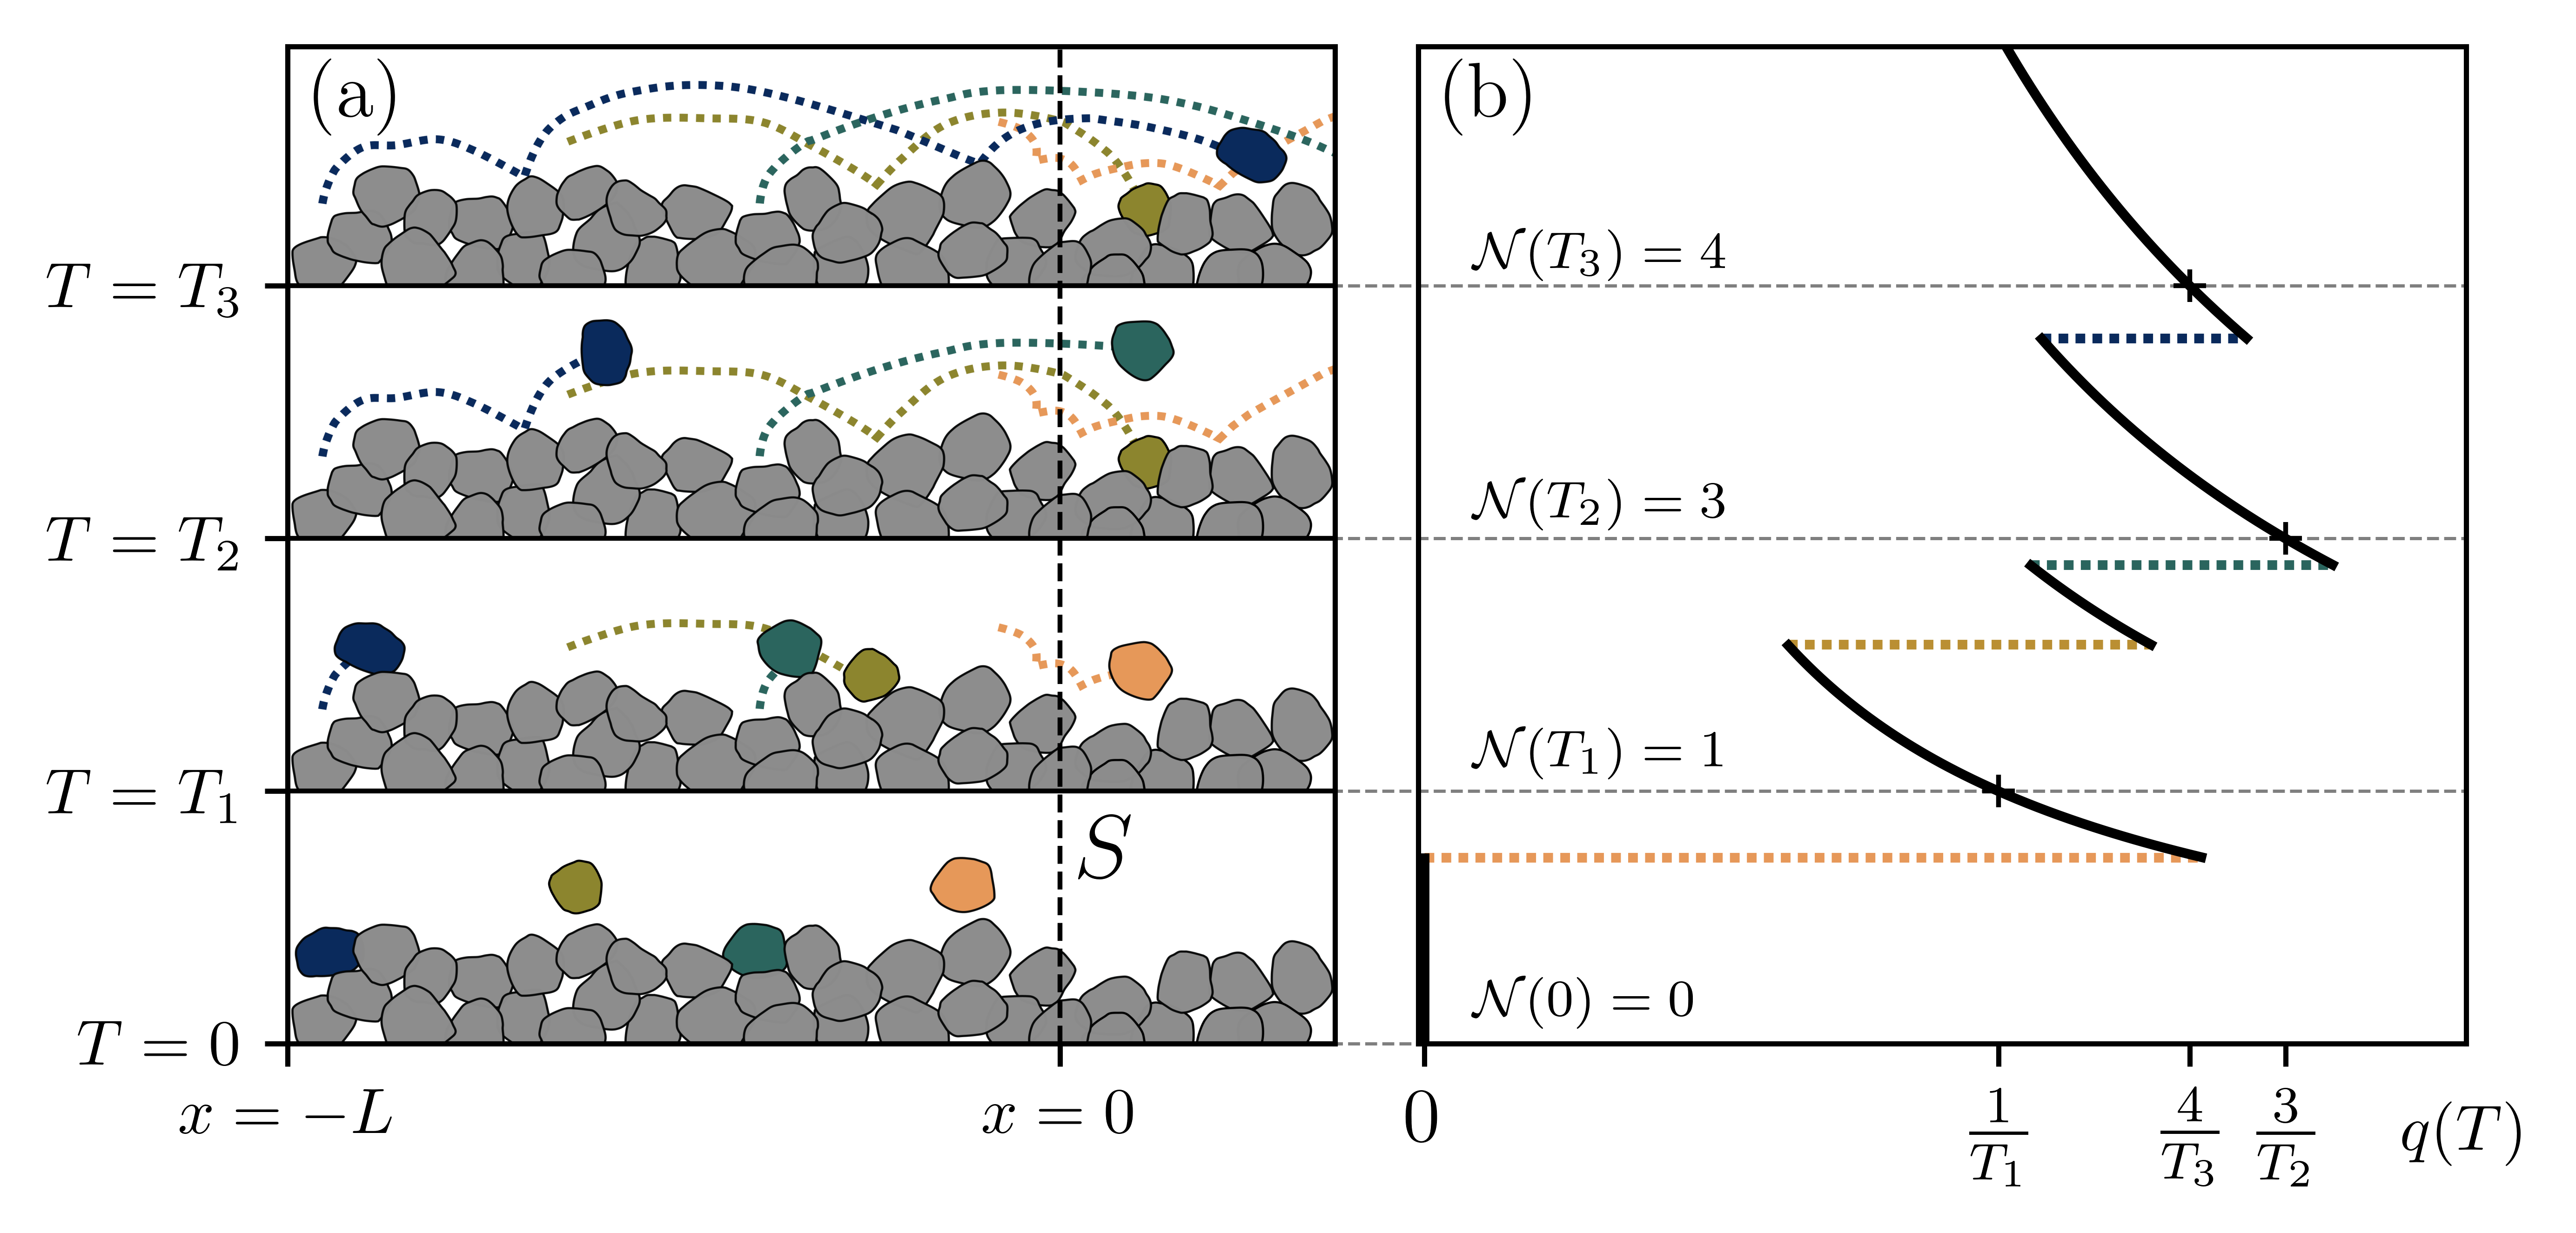

In [65]:
################# now make the real figure..

base = '../figures/fig1timestamps/'
imfiles = sorted([f for f in os.listdir(base) if '.png' in f])
ims = [imread(base+f) for f in imfiles]
ims = [i[:-4,:,:] for i in ims]
trim = 0

def addtrim(im,trim=5):
    outshape= (im.shape[0]+2*trim, im.shape[1]+2*trim,im.shape[2])
    out = np.ones(outshape).astype('int')
    black = np.array([0,0,0,255]).astype('int')
    out[0:trim,:,:] = black
    out[-trim:,:,:] = black
    out[:,0:trim,:]=black
    out[:,-trim:,:]=black
    out[trim:-trim,trim:-trim,:]=im
    return out

#  add black ring to all images
if trim!=0:
    ims = [addtrim(im,trim=trim) for im in ims]
# combine the images to get rid of subplot struggle... 
gap = 40
w,h = ims[0].shape[:-1]

gap_im = np.ones((gap,h,4)).astype('int')*255

bigim = np.vstack((ims[3],
                   gap_im,
                   ims[2],
                   gap_im,
                   ims[1],
                   gap_im,
                   ims[0]
                  ))

xsmol = 4
smol = 6 # the font sizes
med = 10
lar = 12
plt.rc('font',size=med)
plt.rc('axes',titlesize=med)
plt.rc('axes',labelsize=lar)
plt.rc('xtick',labelsize=xsmol)
plt.rc('ytick',labelsize=xsmol)
plt.rc('legend',fontsize=med)
plt.rc('figure',titlesize=med)

# initialize the figure
w = 5.50 # width in inches
h = 2.75 # height

fig, (ax1,ax2) = plt.subplots(nrows=1,
                              ncols=2,
                              figsize=(w,h),
                              dpi=1000,
                              #tight_layout=True,
                              sharey=True)

# add image in left panel
ax1.imshow(np.flipud(bigim),origin='lower',aspect='auto')

# set custom xticks on left panel
ax1.set_xticks([0,1100/s])
ax1.set_xticklabels([r"$x=-L$",r"$x=0$"],fontsize=med)

# set custom yticks for the entire plot
dim = ims[0].shape[0] #356
s = 356/dim
tvals = np.array([0,dim+gap, 2*dim+2*gap, 3*dim+3*gap])
ax1.set_yticks(tvals)
ax1.set_yticklabels([r"$T=0$",r"$T=T_1$",r"$T=T_2$",r"$T=T_3$"],fontsize=med)

# add horizontal lines separating different time slices in the left panel
for tv in tvals[1:]:
    ax1.axhline(tv,color='black',lw=0.75)

# add in the flux surface and an annotation
ax1.text(1125/s,0.65*tvals[1],r"$S$",fontsize=14)
ax1.axvline(1100/s, color='black',lw=0.75,linestyle='--')

# fix the y limits for the entire plot
ax1.set_ylim(0,bigim.shape[0])

# set axis labels on the right plot
ax2.set_xlabel(r"$q(T)$",fontsize=med) # doesn't end up in the right spot
ax2.xaxis.set_label_coords(1.0, -0.058)


qticks = np.array([0,dn/tvals[1],3*dn/tvals[2],4*dn/tvals[3]])
qticklabels = [r"$0$",r"$\frac{1}{T_1}$",r"$\frac{3}{T_2}$",r"$\frac{4}{T_3}$"]
ax2.set_xticks(qticks)
ax2.set_xticklabels(qticklabels,fontsize=lar,va='top')

# adjust the whitespace between plots
plt.subplots_adjust(wspace=0.075)

# set up horizontal and vertical lines indicating values in paenl 2
for tv in tvals:
    ax2.axhline(tv,color=(0,0,0,0.5),lw=0.5,zorder=-1,linestyle='--',
                xmin=-.1, clip_on = False)
#for qt,tv in zip(qticks,tvals):
#    ax2.plot([qt,qt],[0,tv],color=(0,0,0,0.5),lw=0.5,zorder=-1,linestyle='--')


#turn off y ticks on panel 2
ax2.tick_params(axis='y',length=0)

# add little x's at each sampling time on panel 2.
ax2.scatter(qticks[1:],tvals[1:],marker='+',s=25,lw=0.75,color='black')

## First plot all of the transient decay regions in black.
tplot = np.linspace(1e-9,bigim.shape[0],1000) # time over which to plot
crossing_times = np.array([0.7,1.5,1.8,2.65])*1188/3.0 # times at which particles cross. See comment below.
c0 = 0
s = 356/dim # ratchet scale factor to correct for the higher dpi of the 
# images in the left panel from when I originally formulated this stuff
crossing_times = crossing_times/s

dn = 0.75 # this should actually be 1... but for the purposes of presentation I made it smaller.
for i,c in enumerate(crossing_times):
    mask = (tplot>c0)&(tplot<c)
    tc = tplot[mask]
    ax2.plot(i*dn/tc,tc,color='black',lw=1.5,zorder=1)
    c0 = c
mask = tplot>c
tc = tplot[mask]
ax2.plot((i+1)*dn/tc,tc,color='black',lw=1.5,zorder=1)

# Second plot all of the particle arrivals using their own colors

ls = (0, (1, 0.75)) # set custom linestyle to match trajectories from inkscape
ax2.plot([0,dn/crossing_times[0]],[crossing_times[0],crossing_times[0]],lw=1.5,color=c5,zorder=0,linestyle=ls)
ax2.plot([dn/crossing_times[1],2*dn/crossing_times[1]],[crossing_times[1],crossing_times[1]],lw=1.5,color=c4,zorder=0,linestyle=ls)
ax2.plot([2*dn/crossing_times[2],3*dn/crossing_times[2]],[crossing_times[2],crossing_times[2]],lw=1.5,color=c2,zorder=0,linestyle=ls)
ax2.plot([3*dn/crossing_times[3],4*dn/crossing_times[3]],[crossing_times[3],crossing_times[3]],lw=1.5,color=c1,zorder=0,linestyle=ls)

# set the limits on the second plot
qmax = 0.0018
qmin = -0.00001
ax2.set_xlim(qmin,qmax)

# add axis labels
fx = 0.025
fy = 0.93
ax1.text(bigim.shape[1]*fx , bigim.shape[0]*fy,'(a)',fontsize=lar)
ax2.text((qmax-qmin)*fx+qmin, bigim.shape[0]*fy,'(b)',fontsize=lar)


# add in the annotations for the number of particles crossed in the right panel
ntexts = ["$\mathcal{N}(0)=0$", "$\mathcal{N}(T_1)=1$","$\mathcal{N}(T_2)=3$","$\mathcal{N}(T_3)=4$"]
fx = 0.05
for i in range(4):
    tx = ntexts[i]
    fy = 0.25*i+0.015
    ax2.text((qmax-qmin)*fx+qmin, bigim.shape[0]*fy,tx,fontsize=8,va='bottom',ha='left')


# add a white background and save
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.savefig('../figures/figure1.pdf',dpi=600)

plt.show()

it remains to use inkscape to shift x=-L and x=0 and the 0 1/T stuff to be parallel.

$$ \mathcal{N}(\hspace{0.21em}0\hspace{0.21em})=0$$
$$ \mathcal{N}(T_1)=0$$